<a href="https://colab.research.google.com/github/serena526/.github/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
from sklearn.cluster import KMeans

In [4]:
customers = pd.read_csv('/content/Mall_Customers (1).csv')
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
customers.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customers.drop(columns='CustomerID').describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
customers.describe(include='O')

,Gender
count,200
unique,2
top,Female
freq,112


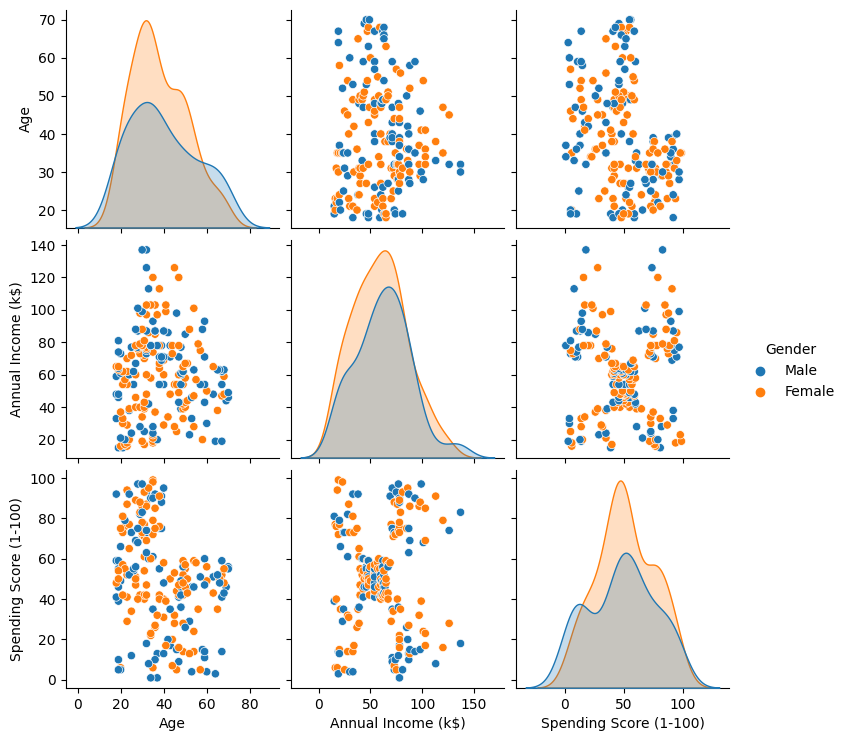

In [8]:
sns.pairplot(customers.drop(columns='CustomerID'), hue='Gender');

In [9]:
customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
customers['Gender'] = customers['Gender'].astype('category').cat.codes
customers['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int8

In [11]:
fig = px.scatter(customers, x=customers.index, y='Spending Score (1-100)', title='Feature Scatter Plot')
fig.show()

In [12]:
df = customers

In [13]:
def plot_3d_clusters(df, feature_cols, num_clusters):
    # extract the feature columns from the dataframe
    X = df[feature_cols]

    # perform K-means clustering with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(X)
    df['cluster'] = kmeans.labels_

    # create 3D scatter plot of the clustered data
    fig = go.Figure(data=[go.Scatter3d(
        x=df[feature_cols[0]],
        y=df[feature_cols[1]],
        z=df[feature_cols[2]],
        mode='markers',
        marker=dict(
            color=df['cluster'],
            size=10,
            opacity=0.8
        )
    )])

    fig.update_layout(scene=dict(
        xaxis_title=feature_cols[0],
        yaxis_title=feature_cols[1],
        zaxis_title=feature_cols[2]
    ), title=f'K-means Clustering {num_clusters} Clusters 3D Scatter Plot')

    return fig

In [14]:
def createKmeanModels(data, mak_k, min_k =1):
    kmodels = [KMeans(n_clusters=k).fit(data) for k in range(min_k, mak_k)]
    return kmodels

In [15]:
for i in range(2, 9):
    fig = plot_3d_clusters(df, ['Age', 'Annual Income (k$)','Spending Score (1-100)'], num_clusters=i)
    fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [16]:
def elbow_plot(data, max_k):

    models = createKmeanModels(data, max_k)
    distortions = [model.inertia_ for model in models]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(1, max_k+1)), y=distortions, mode='lines+markers'))
    fig.update_layout(title='Elbow plot for KMeans clustering',
                      xaxis_title='Number of clusters',
                      yaxis_title='Distortion')

    return fig

In [17]:
elbow_plot(df, 9)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [18]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [19]:
df_ss = StandardScaler().fit_transform(customers)
df_ss = pd.DataFrame(df_ss)
df_ss

,0,1,2,3,4,5
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,0.542922
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,0.058170
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,0.542922
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,0.058170
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,0.542922
...,...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061,1.997178
196,1.671450,-0.886405,0.441365,2.497807,-0.861839,1.512426
197,1.688771,1.128152,-0.491602,2.497807,0.923953,1.997178
198,1.706091,1.128152,-0.491602,2.917671,-1.250054,1.512426


In [20]:
df_ss.columns = customers.columns

In [21]:
df_ss.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

In [22]:
df_ss

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,0.542922
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,0.058170
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,0.542922
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,0.058170
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,0.542922
...,...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061,1.997178
196,1.671450,-0.886405,0.441365,2.497807,-0.861839,1.512426
197,1.688771,1.128152,-0.491602,2.497807,0.923953,1.997178
198,1.706091,1.128152,-0.491602,2.917671,-1.250054,1.512426


In [23]:
df_mm = MinMaxScaler().fit_transform(customers)
df_mm = pd.DataFrame(df_mm)
df_mm

,0,1,2,3,4,5
0,0.000000,1.0,0.019231,0.000000,0.387755,0.571429
1,0.005025,1.0,0.057692,0.000000,0.816327,0.428571
2,0.010050,0.0,0.038462,0.008197,0.051020,0.571429
3,0.015075,0.0,0.096154,0.008197,0.775510,0.428571
4,0.020101,0.0,0.250000,0.016393,0.397959,0.571429
...,...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.860656,0.795918,1.000000
196,0.984925,0.0,0.519231,0.909836,0.275510,0.857143
197,0.989950,1.0,0.269231,0.909836,0.744898,1.000000
198,0.994975,1.0,0.269231,1.000000,0.173469,0.857143


In [24]:
df_mm.columns = customers.columns

In [25]:
customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

In [26]:
fig = px.scatter(df_ss, x=df_ss['Annual Income (k$)'], y='Spending Score (1-100)', title='Feature Scatter Plot')
fig.show()

In [27]:
fig = px.scatter(customers, x=customers['Annual Income (k$)'], y='Spending Score (1-100)', title='Feature Scatter Plot')
fig.show()

In [28]:
fig = px.scatter(df_mm, x=df_mm['Annual Income (k$)'], y='Spending Score (1-100)', title='Feature Scatter Plot')
fig.show()

In [29]:
plot_3d_clusters(df_ss,  ['Age', 'Annual Income (k$)','Spending Score (1-100)'], 5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [30]:
plot_3d_clusters(df_mm,  ['Age', 'Annual Income (k$)','Spending Score (1-100)'], 5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [32]:
from sklearn.decomposition import PCA

In [33]:
X_pca = PCA(n_components=3).fit_transform(df_ss)

In [34]:
df_pca = pd.DataFrame(X_pca)
df_pca

,0,1,2
0,-0.316927,-2.373591,-0.871291
1,-0.983705,-1.931309,-1.563394
2,0.912139,-3.040351,-0.843620
3,-1.042288,-2.018424,-1.873787
4,-0.529040,-2.359274,-0.692044
...,...,...,...
195,-0.130889,3.040289,-0.653309
196,3.112560,1.834726,0.438579
197,0.163106,3.254378,-0.208170
198,3.627412,2.119448,0.409650


In [35]:
df_pca.columns = ['col1', 'col2', 'col3']

In [36]:
for i in range(2, 6):
    fig = plot_3d_clusters(df_pca,  ['col1', 'col2','col3'], i)
    fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

